In [42]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
import itertools
from scipy import stats
import sys
sys.path.insert(0,'../..')
from g4l.data import Sample
from g4l.models import ContextTree
import g4l.display
import g4l.estimators.ctm as ctm

# load initial data
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])
max_depth = 4

#### In the past call we found that SMC using BIC procedure could be missing some trees, depending on the _epsilon_ provided

In [43]:
tree_a = ctm.CTM(1.536489, max_depth).fit(X).context_tree
# Tree A:   c = 1.536489   (11 contexts)     
# tree_a = "000 1 10 100 2 20 200 3 30 300 4"

tree_b = ctm.CTM(10000000000000, max_depth).fit(X).context_tree
# Tree B:   c = 1.037299   (13 contexts)
# tree_b = "000 001 10 100 2 20 200 201 21 3 30 300 4"

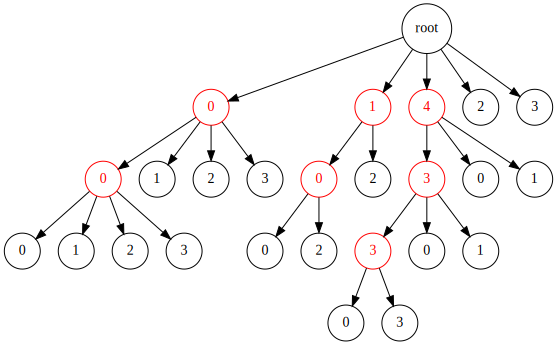

In [44]:
g4l.display.draw_tree(tree_a.to_str())

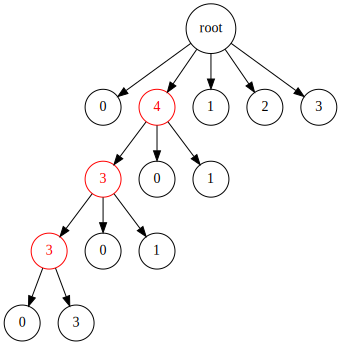

In [45]:
g4l.display.draw_tree(tree_b.to_str())

In [46]:
print('Tree A:', tree_a.to_str())
print('Tree A likelihood:', tree_a.log_likelihood())
print('')
print('Tree B:', tree_b.to_str())
print('Tree B likelihood:', tree_b.log_likelihood())

Tree A: 000 001 0334 034 04 10 100 134 14 2 20 200 201 21 3 30 300 3334
Tree A likelihood: -77355.8504532606

Tree B: 0 0334 034 04 1 134 14 2 3 3334
Tree B likelihood: -104344.08225268252


In [34]:
tree_a.log_likelihood() - tree_b.log_likelihood()

26988.23179942192

It seems that BIC procedure doesn't produce contexts by expanding one leaf per time. The following snippet shows that there's no tree with 12 contexts between $\tau_{BIC_{1.5349703969}}$ (13 contexts) and $\tau_{BIC_{1.5349703970}}$  (11 contexts) for any intermediary value of step 0.00000000001

In [8]:
last_t = ""
vmin  = 1.5349703969
vmax  = 1.5349703970
vstep = 0.00000000001
rng = np.arange(vmin, vmax, vstep)
dfx = pd.DataFrame(columns=['c', 'contexts', 't'])
pbar = tqdm()
pbar.reset(total=len(rng))
for c in rng:
    t = ctm.CTM(initial_tree).execute(c)    
    pbar.update()
    sz = len(t.to_str().split(' '))
    print(c, '\t', sz, '\t', t.to_str())
    if last_t != t.to_str():
        last_t = t.to_str()        
        dfx.loc[len(dfx)] = [c, sz, t.to_str()]
pbar.refresh()
dfx

1.5349703969 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039691 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039692 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039693 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039694 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039695 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039696 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039697 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039698 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039699 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.534970397 	 11 	 000 1 10 100 2 20 200 3 30 300 4


,c,contexts,t
0,1.53497,11,000 1 10 100 2 20 200 3 30 300 4


In [40]:
#tree = ContextTree(X, max_depth=4)
tree_b.log_likelihood()

-104344.08225268252

In [41]:
tree_b.tree()

,node_idx,active,depth,depth_idx,freq,likelihood,node,num_child_nodes,parent_idx
2,2,1,1,2,44111,-62840.152905,0,4.0,None
220,220,1,4,146,2,-1.386294,0334,NaN,73
71,71,1,3,49,19,-12.504090,034,3.0,21
18,18,1,2,13,1526,-983.111817,04,3.0,4
1,1,1,1,1,21830,-18794.382713,1,2.0,None
69,69,1,3,47,12,-6.748022,134,2.0,21
14,14,1,2,9,510,-318.792401,14,2.0,4
0,0,1,1,0,21830,-14715.435172,2,4.0,None
3,3,1,1,3,7909,-6671.568838,3,4.0,None
218,218,1,4,144,1,0.000000,3334,NaN,73
